### **Filtrar las noticias descargadas con ChatGPT**
_Por Juan Carlos Rodríguez-Raga y Andrés Mauricio Toloza Cruz_

Este código proporciona herramientas a través del manejo de la API de OpenAi para poder clasificar de manera más precisisa si una noticia habla sobre alguna protesta social en Colombia.

Este trabajo se hace en el marco del proyecto "What do they show?"

##### **Primer paso: descargar e importar nuestras librerias**
Las librerias que estaremos usando son Pandas, OpenAI y MatplotLib  para descargarlas usamos el siguiente código:

    ! pip install pandas

    ! pip install openai

    ! pip install matplotlib

Tambien usaremos numpy, pero esta ya viene en nuestra instalación de Python

In [1]:
# Importamos las lbrerias necesarias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openai

##### **Segundo paso: importamos y hacemos algunas modificaciones a nuestra base de datos**

In [9]:
df_news = pd.read_csv('parse_data_filtro1_chekpoint.csv')

In [10]:
df_news.head()

,title,published_date,top_image,link,full_link,text
0,Ante posibles protestas de motociclistas Alcal...,2024-02-10 00:00:00,https://vanguardiaeluniversal-vanguardia-prod....,www.vanguardia.com,https://www.vanguardia.com/area-metropolitana/...,El alcalde de Bucaramanga Jaime Andrés Beltrán...
1,¿Tras las marchas de oposición se agudizaría l...,2023-06-21 14:51:29-05:00,https://imagenes.noticiasrcn.com/ImgNoticias/p...,www.noticiasrcn.com,https://www.noticiasrcn.com/colombia/tras-las-...,Este 20 de junio en todo el país se desarrolló...
2,El joven que dejó morir un perro para su obra ...,2013-11-29 15:34:57+00:00,https://www.las2orillas.co/wp-content/uploads/...,www.las2orillas.co,https://www.las2orillas.co/el-artista-dejo-mor...,"Dejó morir un perro, elevó palomas muertas con..."
3,Ecuador envía nota de protesta a Colombia por ...,2018-06-23 09:28:16-05:00,https://imagenes.noticiasrcn.com/ImgNoticias/s...,www.noticiasrcn.com,https://www.noticiasrcn.com/colombia/ecuador-e...,El Ministerio ecuatoriano de Relaciones Exteri...
4,Los inspiradores jóvenes que con cultura y dep...,2019-12-02 11:11:06+00:00,https://www.elpais.com.co/resizer/v2/6IEGOBD7S...,www.elpais.com.co,https://www.elpais.com.co/zona-diamante/los-jo...,"En días de paro nacional, Cali es una ciudad d..."


In [11]:
# Hacemos una copia de nuestro dataframe original

df_check = df_news

# Creamos una nueva columna con datos NaN. En esta columna almacenaremos las respuestas de ChatGPT

df_check.loc[:, 'GPT_check'] = np.nan

En este caso, para mayor facilidad y menor consumo de recursos solo le daremos a ChatGPT las 50 primeras palabras de cada artículo y su título.

In [12]:
# Creamos una columna que tenga las 50 primeras palabras de cada artículo

# Definir una función que devuelva las primeras 50 palabras de un texto
def primeras_50_palabras(texto):
    palabras = texto.split()[:50]
    return ' '.join(palabras)

# Aplicar la función a la columna 'text' que contiene el texto de los artículos
df_check['text_50'] = df_check['text'].apply(primeras_50_palabras)

print(df_check[['text', 'text_50']])

                                                   text  \
0     El alcalde de Bucaramanga Jaime Andrés Beltrán...   
1     Este 20 de junio en todo el país se desarrolló...   
2     Dejó morir un perro, elevó palomas muertas con...   
3     El Ministerio ecuatoriano de Relaciones Exteri...   
4     En días de paro nacional, Cali es una ciudad d...   
...                                                 ...   
5607  Durante las violentas protestas en Baltimore (...   
5608  El viernes, Gustavo Petro dio en Cali uno de s...   
5609  El Ministerio de Salud derogó la norma que pro...   
5610  Sindicalistas del CGT participaron ayer en una...   
5611  Varias manifestaciones y el cierre del puente ...   

                                                text_50  
0     El alcalde de Bucaramanga Jaime Andrés Beltrán...  
1     Este 20 de junio en todo el país se desarrolló...  
2     Dejó morir un perro, elevó palomas muertas con...  
3     El Ministerio ecuatoriano de Relaciones Exteri...  
4

##### **Tercer paso: utilizar ChatGPT para filtrar las noticias**

En este caso utilizaré el modelo gpt-4o-mini, ya que es un modelo económico con buenos resultados.

La documentación de la API y el módelo estan en los siguientes links:

[API-Reference](https://platform.openai.com/docs/api-reference/introduction)

[Model-Reference](https://platform.openai.com/docs/models/gpt-4o-mini)

In [18]:
# Creamos una función que nos permita hacer la consulta a ChatGPT y nos devuelva la respuesta

def check_protest(row):
    client = openai(
        api_key='API-KEY'
        )

    completion = client.chat.completions.create(
        model="gpt-4o-mini",
        messages=[
            {"role": "system", "content": "Eres un bot que determina si una noticia habla de una protesta social, movilización social, manifestación social, huelga o paro en Colombia o alguna de sus ciudades. Debes responder solo con sí o no."},
            {"role": "user", "content": "Esta noticia habla de una protesta social, movilización social, manifestación, huelga o paro en Colombia o alguna de sus ciudades. Título:" + df_check['title'][row] + "Articulo: " + df_check['text_50'][row]},
        ]
        )
    return completion.choices[0].message.content

In [ ]:
# Hacemos la consulta a ChatGPT para cada artículo y almacenamos la respuesta en la columna 'GPT_check'

for i in range(len(df_check)):
    df_check.loc[i, 'GPT_check'] = check_protest(i)

In [21]:
df_check.head()

,title,published_date,top_image,link,full_link,text,GPT_check,text_50
0,Ante posibles protestas de motociclistas Alcal...,2024-02-10 00:00:00,https://vanguardiaeluniversal-vanguardia-prod....,www.vanguardia.com,https://www.vanguardia.com/area-metropolitana/...,El alcalde de Bucaramanga Jaime Andrés Beltrán...,Sí,El alcalde de Bucaramanga Jaime Andrés Beltrán...
1,¿Tras las marchas de oposición se agudizaría l...,2023-06-21 14:51:29-05:00,https://imagenes.noticiasrcn.com/ImgNoticias/p...,www.noticiasrcn.com,https://www.noticiasrcn.com/colombia/tras-las-...,Este 20 de junio en todo el país se desarrolló...,Sí,Este 20 de junio en todo el país se desarrolló...
2,El joven que dejó morir un perro para su obra ...,2013-11-29 15:34:57+00:00,https://www.las2orillas.co/wp-content/uploads/...,www.las2orillas.co,https://www.las2orillas.co/el-artista-dejo-mor...,"Dejó morir un perro, elevó palomas muertas con...",No,"Dejó morir un perro, elevó palomas muertas con..."
3,Ecuador envía nota de protesta a Colombia por ...,2018-06-23 09:28:16-05:00,https://imagenes.noticiasrcn.com/ImgNoticias/s...,www.noticiasrcn.com,https://www.noticiasrcn.com/colombia/ecuador-e...,El Ministerio ecuatoriano de Relaciones Exteri...,No,El Ministerio ecuatoriano de Relaciones Exteri...
4,Los inspiradores jóvenes que con cultura y dep...,2019-12-02 11:11:06+00:00,https://www.elpais.com.co/resizer/v2/6IEGOBD7S...,www.elpais.com.co,https://www.elpais.com.co/zona-diamante/los-jo...,"En días de paro nacional, Cali es una ciudad d...",Sí,"En días de paro nacional, Cali es una ciudad d..."


In [22]:
# Hacemos un dataframe con las noticias que ChatGPT identificó como que hablan de protestas

df_check_si = df_check[df_check['GPT_check'] == 'Sí']

In [23]:
df_check_si.head()

,title,published_date,top_image,link,full_link,text,GPT_check,text_50
0,Ante posibles protestas de motociclistas Alcal...,2024-02-10 00:00:00,https://vanguardiaeluniversal-vanguardia-prod....,www.vanguardia.com,https://www.vanguardia.com/area-metropolitana/...,El alcalde de Bucaramanga Jaime Andrés Beltrán...,Sí,El alcalde de Bucaramanga Jaime Andrés Beltrán...
1,¿Tras las marchas de oposición se agudizaría l...,2023-06-21 14:51:29-05:00,https://imagenes.noticiasrcn.com/ImgNoticias/p...,www.noticiasrcn.com,https://www.noticiasrcn.com/colombia/tras-las-...,Este 20 de junio en todo el país se desarrolló...,Sí,Este 20 de junio en todo el país se desarrolló...
4,Los inspiradores jóvenes que con cultura y dep...,2019-12-02 11:11:06+00:00,https://www.elpais.com.co/resizer/v2/6IEGOBD7S...,www.elpais.com.co,https://www.elpais.com.co/zona-diamante/los-jo...,"En días de paro nacional, Cali es una ciudad d...",Sí,"En días de paro nacional, Cali es una ciudad d..."
6,Justin Bieber se pronunció sobre protestas en ...,2021-05-04 16:17:52-05:00,https://imagenes.eltiempo.com/files/og_thumbna...,www.eltiempo.com,https://www.eltiempo.com/cultura/gente/cantant...,Con el paso de los días más personajes del med...,Sí,Con el paso de los días más personajes del med...
7,Oposición convoca nuevas marchas contra el Gob...,2023-04-04 00:00:00,https://www.wradio.com.co/resizer/v2/https%3A%...,www.wradio.com.co,https://www.wradio.com.co/2023/04/04/oposicion...,A propósito de la discusión de las reformas es...,Sí,A propósito de la discusión de las reformas es...


In [ ]:
# Guardamos nuestros dataframes en archivos CSV

df_check.to_csv('df_check.csv', index=False)

df_check_si.to_csv('df_check_si.csv', index=False)

##### **Cuarto paso: describimos la distribución de nuestros datos**

Finalmente, realizaré alguna gráficas para conocer cómo los datos están distribuidos. Para esto utilizaremos la libreria MatplotLib.

In [2]:
df_check_si = pd.read_csv('df_check_si.csv')

In [10]:
# 1. Hacemos un conteo por links 

conteo = df_check_si['link'].value_counts()

print(conteo)

link
caracol.com.co            432
www.eltiempo.com          430
www.semana.com            420
www.elespectador.com      405
www.noticiasrcn.com       323
www.las2orillas.co        316
www.minuto30.com          266
www.elpais.com.co         263
www.wradio.com.co         226
www.vanguardia.com        174
www.lasillavacia.com      163
www.elcolombiano.com      113
www.lavanguardia.com       10
blogs.vanguardia.com        4
eldinero.com.do             2
especiales.semana.com       2
viajeroseneltiempo.com      1
vanguardia.com.mx           1
citytv.eltiempo.com         1
Name: count, dtype: int64


In [4]:
# 2. Reorganizaré la variable published_date para que sea más fácil de trabajar

# Asegurarse de que la columna es de tipo string
df_check_si['published_date'] = df_check_si['published_date'].astype(str)

# Mantener solo los primeros 10 caracteres que corresponden al año y al mes
df_check_si['published_date'] = df_check_si['published_date'].str[:10]

# Convertimos published_date a datetime
df_check_si['published_date'] = pd.to_datetime(df_check_si['published_date'])

# Hacemos una columna con el año y mes
df_check_si['year_month'] = df_check_si['published_date'].dt.to_period('M')

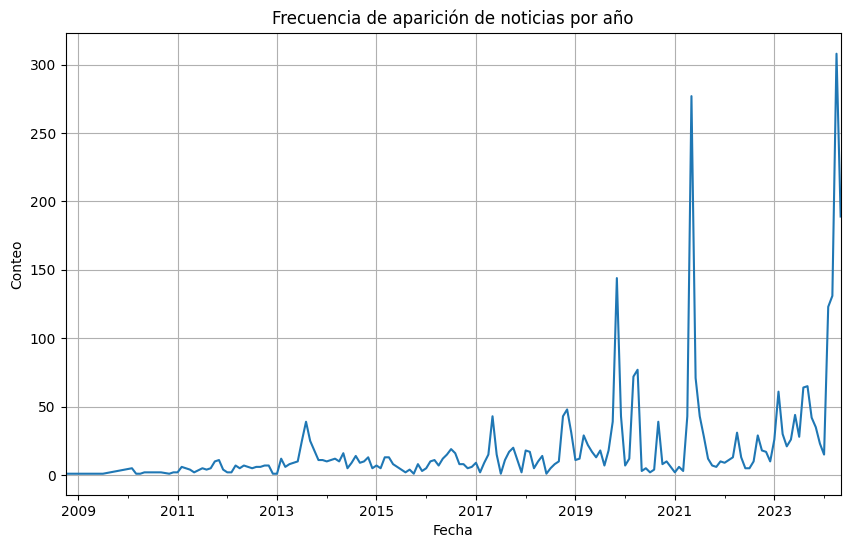

In [5]:
# Agrupamos para contar cuántas noticias hay por año y mes
conteo_por_fecha = df_check_si.groupby('year_month')['link'].count()

# Graficaremos el conteo de noticias por año y mes
plt.figure(figsize=(10, 6))
conteo_por_fecha.plot()
plt.title('Frecuencia de aparición de noticias por año')
plt.xlabel('Fecha')
plt.ylabel('Conteo')
plt.grid(True)
plt.show()

In [11]:
# Hacemos una función que nos permita graficar la frecuencia de aparición de un link en particular

def graficar_x_link(link):
    df_filtrado = df_check_si[df_check_si['link'] == link]

    # Agrupar por fecha y contar las ocurrencias
    conteo_por_fecha = df_filtrado.groupby('year_month').size()

    # Graficar
    plt.figure(figsize=(10, 6))
    conteo_por_fecha.plot()
    plt.title(f'Frecuencia de aparición de "{link}" por fecha')
    plt.xlabel('Fecha')
    plt.ylabel('Conteo')
    plt.grid(True)
    plt.show()

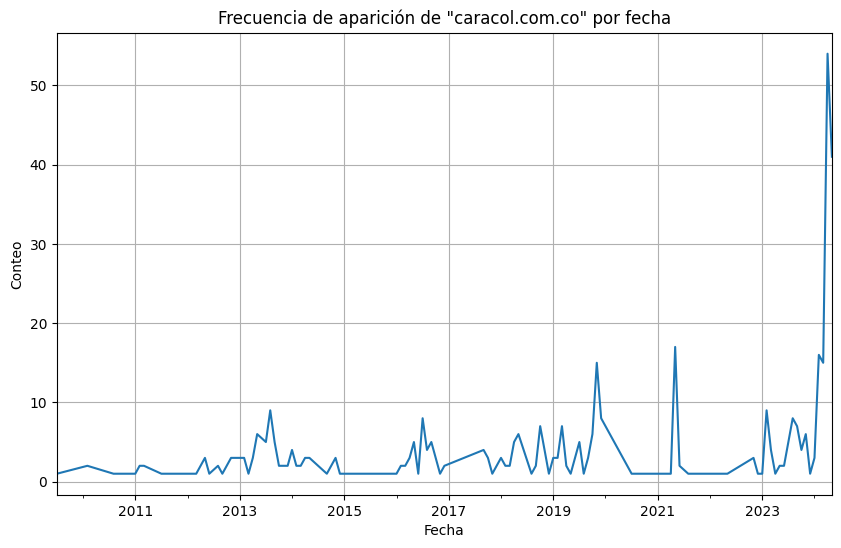

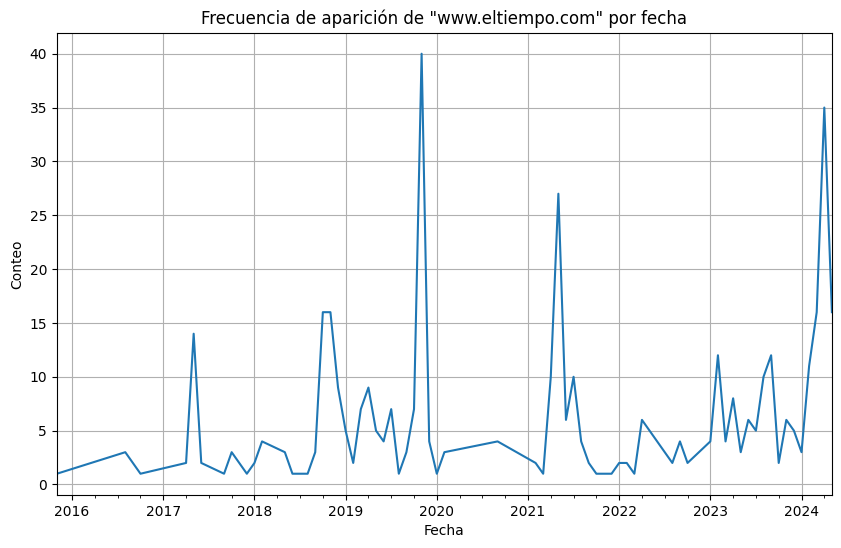

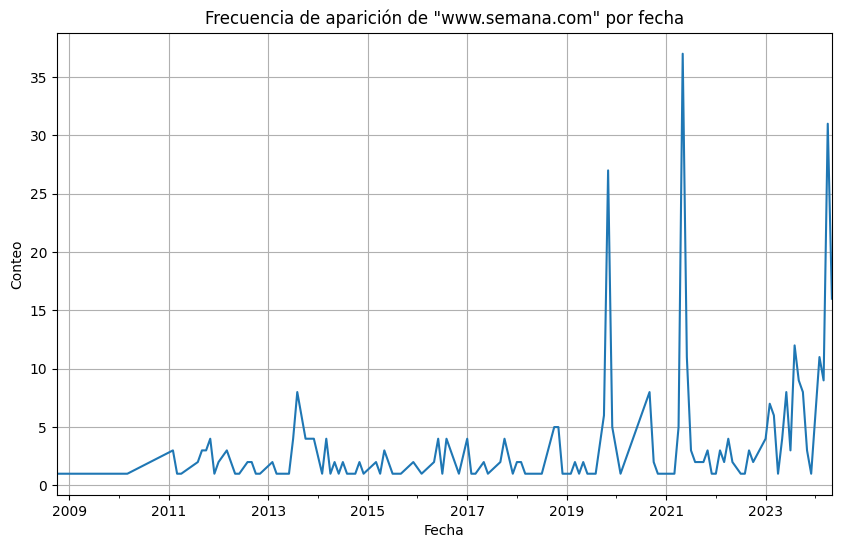

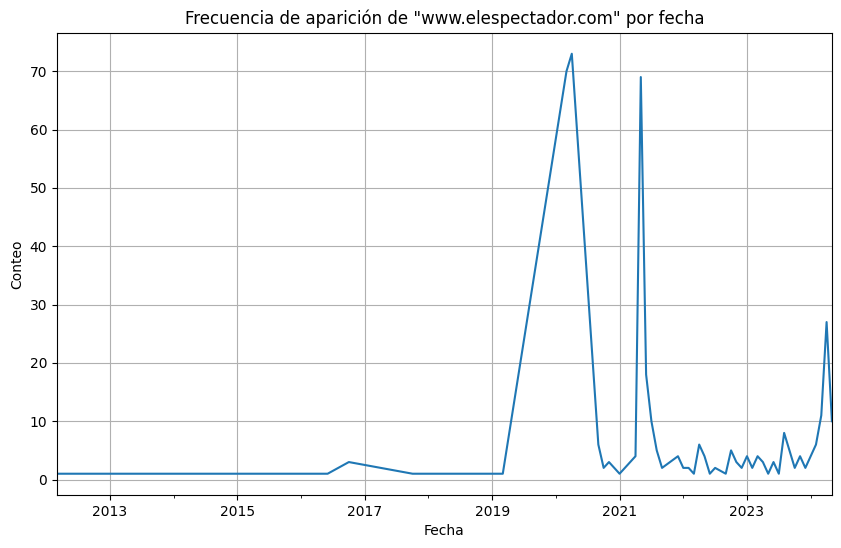

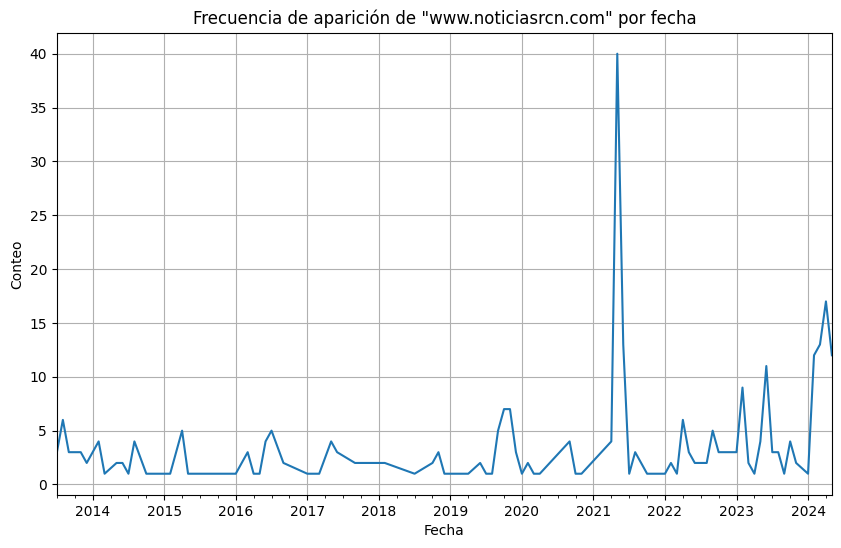

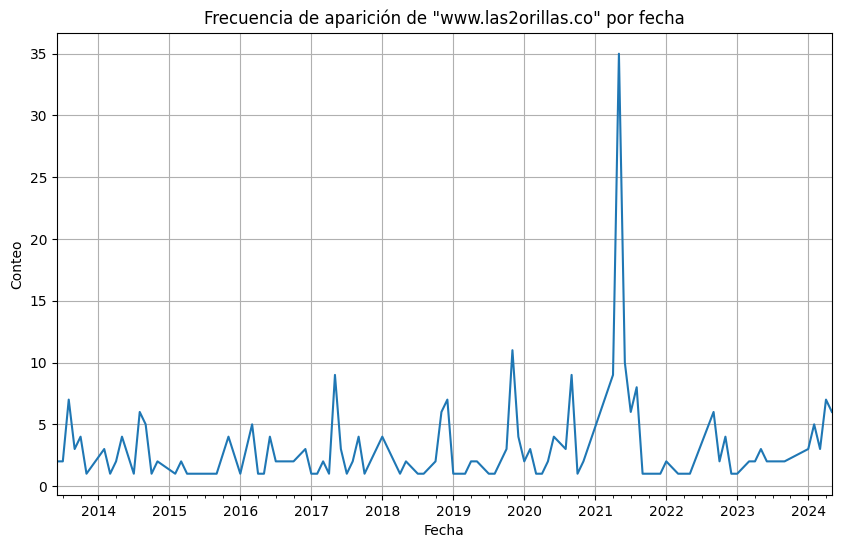

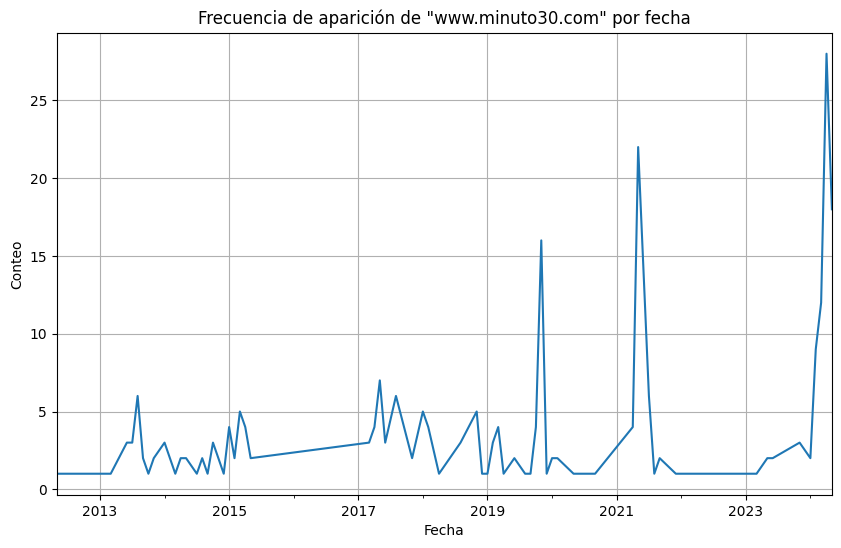

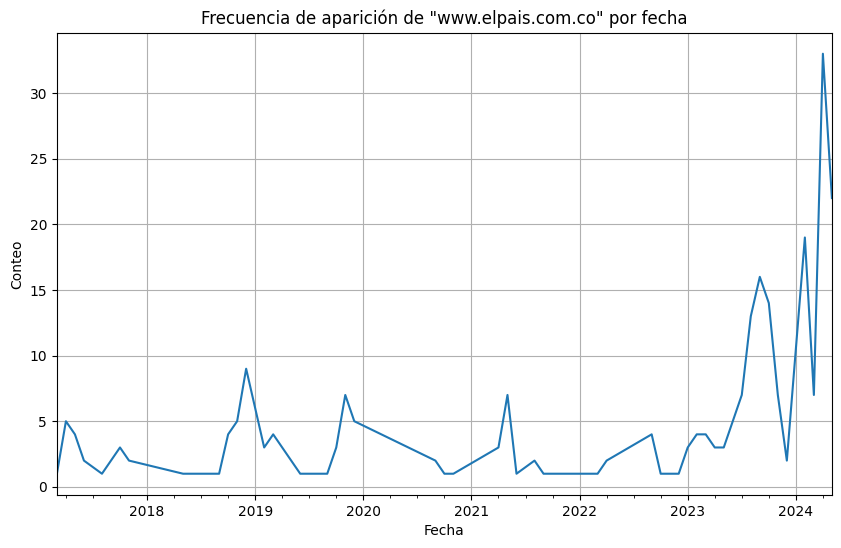

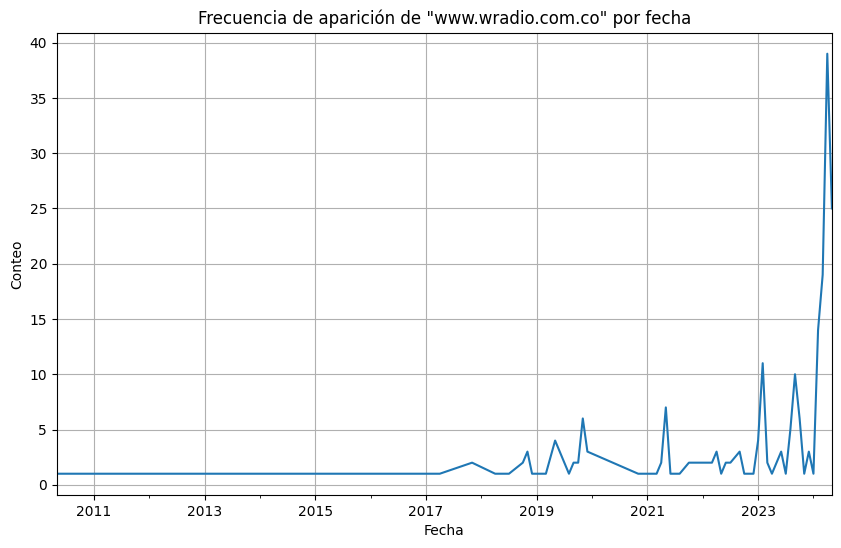

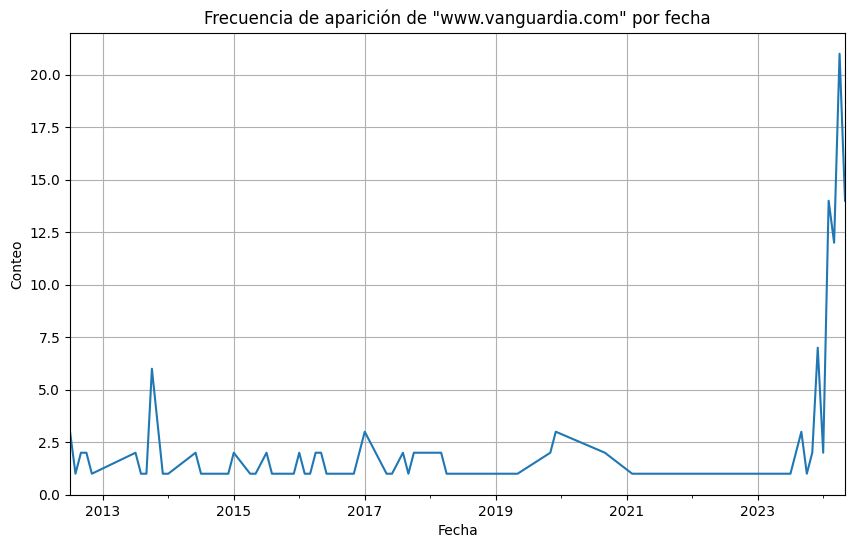

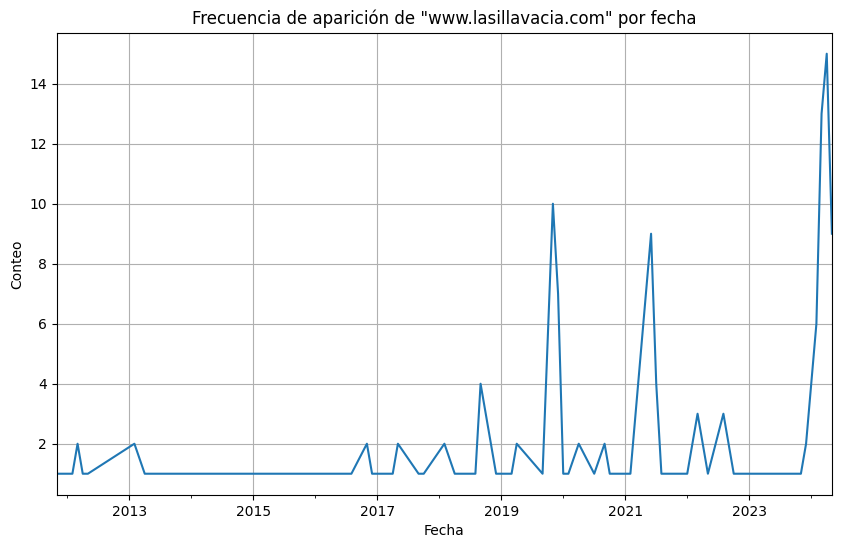

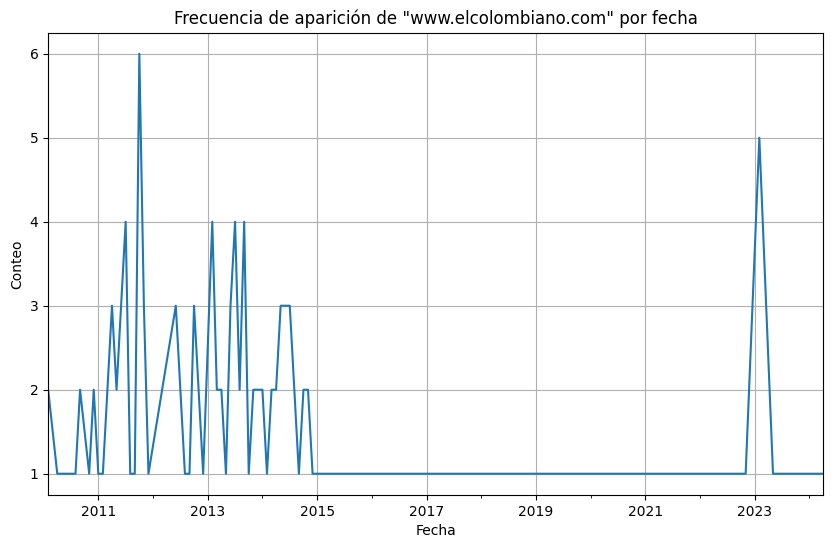

In [15]:
for link in conteo.index[0:12]:
    graficar_x_link(link)